<a href="https://colab.research.google.com/github/cedjustin/AI/blob/master/sprint18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


[Problem 1] Learning classification with self-made dataset

In [77]:
batch_size = 2
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

[Problem 2] Data expansion for classification dataset

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [79]:
image_generator = ImageDataGenerator(rescale=1./255)

In [80]:
gen_train = image_generator.flow_from_directory(batch_size=batch_size,
                                          directory="drive/MyDrive/dataset/",
                                          shuffle=True,
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          class_mode='binary')

Found 8 images belonging to 2 classes.


In [81]:
train_data, labels = next(gen_train)

In [82]:
import matplotlib.pyplot as plt

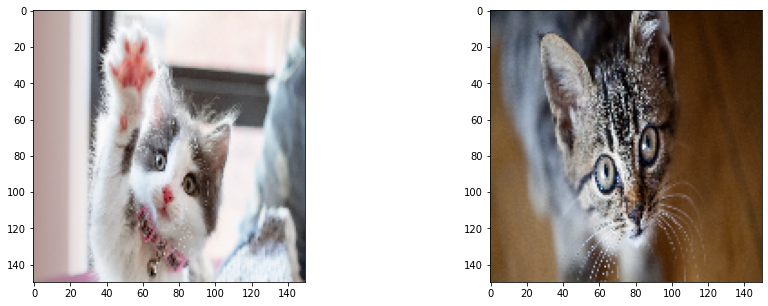

In [83]:
plt.figure(figsize=(15,5))
for i in range(len(train_data)):
    plt.subplot(1, 2, i+1)
    plt.imshow(train_data[i])

In [84]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers

In [85]:
model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [86]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [88]:
model.fit_generator(generator=gen_train, epochs=epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
4/4 [==============================] - 1s 173ms/step - loss: 0.7312 - accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 1s 181ms/step - loss: 0.7021 - accuracy: 0.5000
Epoch 3/15
4/4 [==============================] - 1s 180ms/step - loss: 0.6660 - accuracy: 0.6250
Epoch 4/15
4/4 [==============================] - 1s 172ms/step - loss: 0.6081 - accuracy: 0.7500
Epoch 5/15
4/4 [==============================] - 1s 176ms/step - loss: 0.5095 - accuracy: 1.0000
Epoch 6/15
4/4 [==============================] - 1s 175ms/step - loss: 0.4510 - accuracy: 1.0000
Epoch 7/15
4/4 [==============================] - 1s 182ms/step - loss: 0.2632 - accuracy: 1.0000
Epoch 8/15
4/4 [==============================] - 1s 175ms/step - loss: 0.1197 - accuracy: 1.0000
Epoch 9/15
4/4 [==============================] - 1s 177ms/step - loss: 0.0539 - accuracy: 1.0000
Epoch 10/15
4/4 [==============================] - 1s 175ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 11/15
4/4 [==

[Problem 3] Preparation of object detection dataset